# Section 3: Jupyter Notebooks Tutorial

Jupyter Lab is the evolution of Jupyter Notebook

### Keyboard commands

GO INTO EDIT MODE
- return key

GO INTO COMMAND MODE
- escape key

ADD CELL ABOVE
- a

DELETE CELL
- dd

ADD CELL BELOW
- b

SWITCH TYPE
- markdown --> m
- python --> y

RUN CODE
- shift + return

UNDO SOMETHING
- command + z

CUT SOMETHING
- x

PASTE
- v

COPY
- c


### Interacting with data

In [5]:
import requests #to pull data from web
import pandas as pd

In [6]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

getting data from Bitcoin and Ether for last 7 days

In [7]:
last_week = (pd.Timestamp.now()-pd.offsets.Day(7))
last_week

Timestamp('2020-04-18 15:04:55.915757')

In [8]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [9]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [10]:
#defined in the function to get it once per hour
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-04-18 16:00:00,7232.88,7254.41,7218.00,7247.13,466.038080,3.372351e+06
2020-04-18 17:00:00,7253.48,7262.47,7167.29,7193.69,463.775110,3.340473e+06
2020-04-18 18:00:00,7189.42,7218.92,7180.77,7191.82,110.401681,7.943551e+05
2020-04-18 19:00:00,7198.15,7206.44,7178.15,7192.10,129.613225,9.319797e+05
2020-04-18 20:00:00,7193.80,7234.94,7189.02,7218.29,96.647517,6.976421e+05


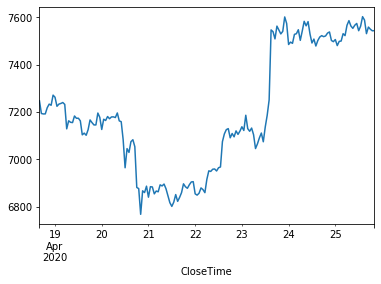

In [12]:
btc['ClosePrice'].plot()

In [13]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-04-18 16:00:00,183.23,185.00,182.52,184.21,1112.119732,2.044293e+05
2020-04-18 17:00:00,185.00,185.44,181.42,182.87,2120.669182,3.880490e+05
2020-04-18 18:00:00,182.65,182.94,181.85,182.12,6734.088019,1.227702e+06
2020-04-18 19:00:00,182.64,182.68,181.95,182.50,1757.348215,3.207291e+05
2020-04-18 20:00:00,182.55,183.34,182.10,182.83,284.523412,5.201730e+04


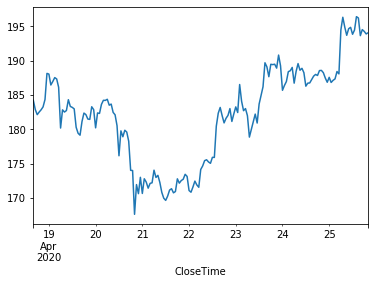

In [14]:
eth['ClosePrice'].plot()

In [15]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02
mean,182.229595,183.398092,180.986069,182.291792,2340.099911,4.275708e+05
std,7.001702,6.973967,7.005446,7.017256,3383.866274,6.064079e+05
min,167.200000,170.720000,166.800000,167.600000,19.940314,3.865587e+03
25%,175.900000,178.130000,175.080000,175.900000,650.157193,1.216940e+05
50%,182.790000,183.670000,181.710000,182.830000,1186.738447,2.158418e+05
75%,187.420000,188.400000,186.550000,187.520000,2729.474956,4.786633e+05
max,196.680000,198.300000,194.630000,196.400000,32313.817866,5.523162e+06


### Dynamic plots with Bokeh

In [17]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [18]:
output_notebook()

Loading BokehJS ...

Generate the plot

In [20]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

### Exporting to Excell

In [21]:
#create an excel writer
writer = pd.ExcelWriter('cryptos.xlsx')

In [22]:
#adding bitcoin and ether as separate sheets
btc.to_excel(writer, sheet_name='Bitcoin')
eth.to_excel(writer, sheet_name='Ether')

In [23]:
#save file
writer.save()